# Explore, model and predict

## Explore input data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
rul = pd.read_csv('data/rul.csv')
test = pd.read_csv('data/test.csv')
print('train shape=' + str(train.shape))
print('test shape=' + str(test.shape))
print('rul shape=' + str(rul.shape))

train shape=(160359, 27)
test shape=(104897, 27)
rul shape=(707, 3)


In [3]:
def get_dataset(df, dataset_id='FD001'):
    return df[df['dataset_id']==dataset_id]

def get_all_data(train_data, test_data, rul_data, dataset_id='FD001'):
    return (get_dataset(train_data, dataset_id=dataset_id),
            get_dataset(test_data, dataset_id=dataset_id),
            get_dataset(rul_data, dataset_id=dataset_id))

In [4]:
train1, test1, rul1 = get_all_data(train, test, rul, dataset_id='FD001')

In [5]:
train1.head()

,dataset_id,unit_id,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
115008,FD001,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
115009,FD001,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
115010,FD001,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
115011,FD001,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
115012,FD001,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
train1_desc = train1.describe()
train1_desc.head(8)

,unit_id,cycle,setting 1,setting 2,setting 3,sensor 1,sensor 2,sensor 3,sensor 4,sensor 5,...,sensor 12,sensor 13,sensor 14,sensor 15,sensor 16,sensor 17,sensor 18,sensor 19,sensor 20,sensor 21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [7]:
# choose some columns that seem to be more relevant ie standard deviation is > 0. Essentially we exclude constant columns.
def get_relevant_columns(description_data, top=5):
    std_pct = pd.Series(description_data.transpose()['std'] / description_data.transpose()['mean'])
    sensor_cols = sorted([(v, k) for k, v in zip(std_pct.keys(), std_pct.values) if 'sensor' in k], reverse=True)
    return [k for v,k in sensor_cols[:top]]

In [17]:
sensors = get_relevant_columns(train1_desc, top=7)
print(sensors)

['sensor 4', 'sensor 11', 'sensor 20', 'sensor 21', 'sensor 15', 'sensor 17', 'sensor 3']


In [11]:
def get_sensor_data(df, name='sensor 4'):
    return [df[df['unit_id']==i][name] for i in df['unit_id'].unique()]

## Visualize training data

In [12]:
# helper function for generating subplots from list of inputs as 'data'
def plotter(data, fig_size=(15,10), nr_rows=2, nr_cols=3, randomize=False, sub_title_prefix=''):
    plt.figure(figsize=fig_size)
    c = 0
    if randomize==True:
        idx = np.random.permutation(len(data))[:nr_rows * nr_cols]
    else:
        idx = list(range(nr_rows * nr_cols))
    for j in range(nr_rows):
        for i in range(nr_cols):
            ch = plt.subplot(nr_rows,nr_cols,c+1)
            if isinstance(sub_title_prefix, list):
                ch.title.set_text(sub_title_prefix[idx[c]])
            else:
                ch.title.set_text(sub_title_prefix + str(idx[c]+1))
            plt.plot(range(len(data[idx[c]])),data[idx[c]])
            c += 1    

### Plotting data from one sensor by unit_id

sensor 4 samples by unit_id


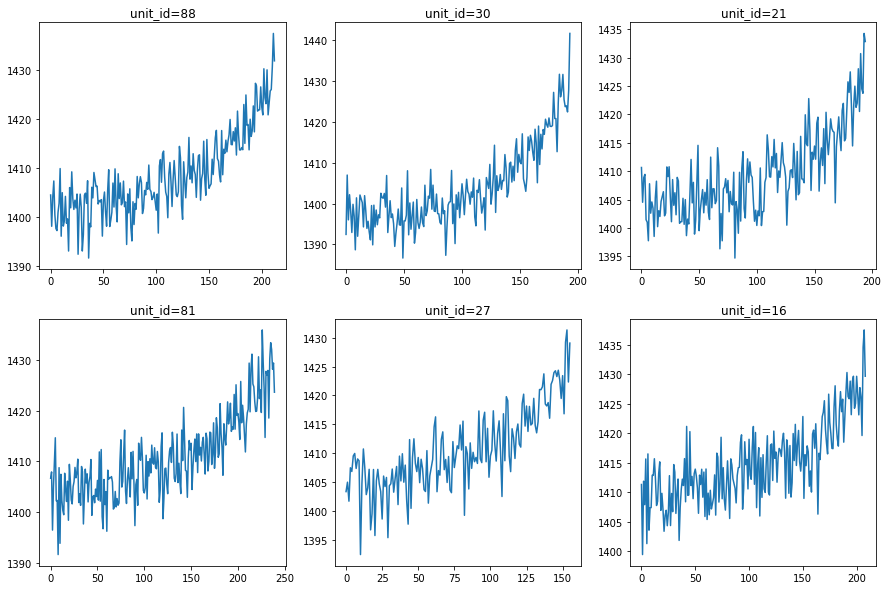

In [13]:
print('sensor 4 samples by unit_id')
sensor_data = get_sensor_data(train1, 'sensor 4')
plotter(sensor_data, fig_size=(15,10), nr_rows=2, nr_cols=3, randomize=True, sub_title_prefix='unit_id=')

sensor 11 samples by unit_id


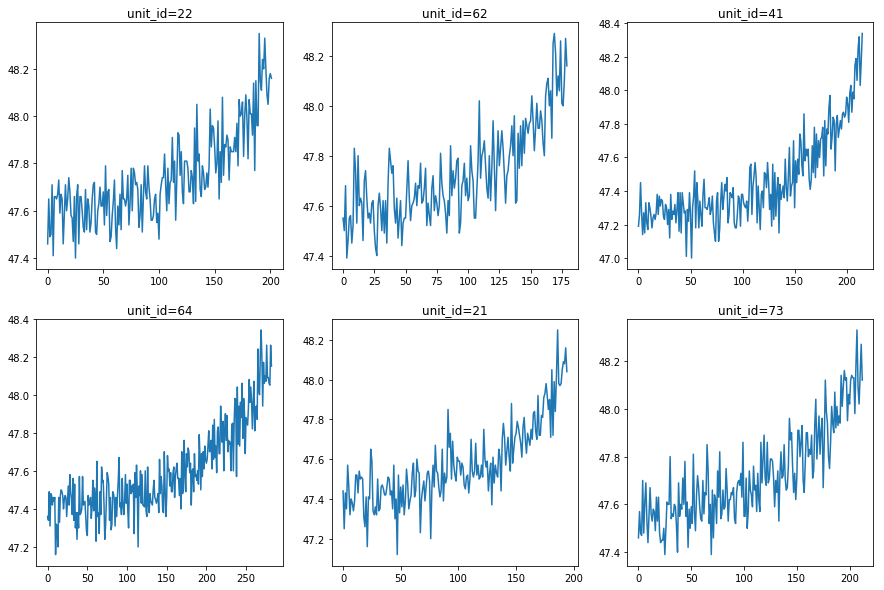

In [14]:
print('sensor 11 samples by unit_id')
sensor_data = get_sensor_data(train1, 'sensor 11')
plotter(sensor_data, fig_size=(15,10), nr_rows=2, nr_cols=3, randomize=True, sub_title_prefix='unit_id=')


### Plotting data from one unit_id by sensors

Visualize data by unit_id. Let's take some sample columns. In our case 6 sensor columns out of 'relevant' columns that we selected out previously.
This kind of visualization could be very helpful later on if we want to dig into outliers, the ones that generated biggest errors in prediction. After predicting we can sort out top errors and see corresponding test set samples.

In [15]:
#Visualize by unit_id
def get_data_by_unit_id(df, unit_id=1, columns=['sensor 1']):
    return [np.asarray(df[df['unit_id']==unit_id][c]) for c in columns]
#    return df[df['unit_id']==unit_id][columns]

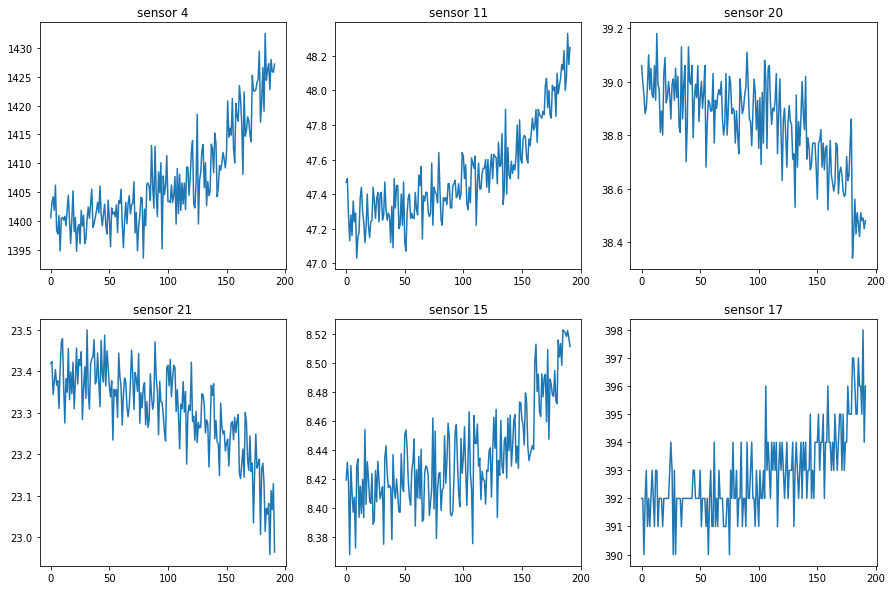

In [18]:
df = get_data_by_unit_id(train1, unit_id=1, columns=sensors)
plotter(df, fig_size=(15,10), nr_rows=2, nr_cols=3, randomize=False, sub_title_prefix=sensors)


# Model Building and prediction

Our plan of attack for prediction logic is as follows:
- loop over all unit_id-s in training set
- for each unit_id:
    - calculate 'statistic' and 'labels' timeseries: X and Y respectively for model.
    - instantiate new model and fit model to X and Y
    - predict with this unit_id-s model
- sort all predictions and choose best 5 unit_id-s: smallest test error
- final result = average of best 5 predictions

In [19]:
slice_len = 5 # this is len of history when calculating timeseries statistic eg 5-day moving average in this example.

# predictions are based on this function. this could be some sort of a statistic on a given time series
def statistic(tseries, slice_len=50, f=np.mean):
    return np.asarray([f(tseries[i:i+slice_len]) for i in range(len(tseries) - slice_len)])

# effectively we are turning regression problem into classification. Calculate labels as remaining cycles time series.
def labels(tseries, slice_len=50):
    return list(range(len(tseries), slice_len, -1))

def abs_mean_error(pred, truth):
    return np.mean(np.abs(pred - truth))

def mean_squared_error(pred, truth):
    return np.mean(np.square(pred - truth))

def rmse(pred, truth):
    return np.sqrt(np.mean(np.square(pred - truth)))

For a starting baseline let's predict with constant and see whether we can find a model that outperforms that result, at least.

In [21]:
#baseline estimate with constant prediction.
test_error = sorted([(abs_mean_error(i, rul1['rul']),i) for i in range(20,120)])[0] # dataset1 constant 85 gives 35.9
test_error_rmse = sorted([(rmse(i, rul1['rul']),i) for i in range(20,120)])[0]
print('baseline errors with const prediction. ' + 'mae/const: ' + str(test_error), '| rmse/const: ' + str(test_error_rmse))

baseline errors with const prediction. mae/const: (35.9, 85) | rmse/const: (41.558392654192005, 76)


As for models, I tried various that can be seen below. Most of them give pretty much similar accuracy. My final choice was RandomForestClassifier as it seemed to outperform others a little.

In [22]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

In [23]:
def get_model():
    return RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0) # top5=18.1 [65,29,74,93,39]

    # other models with their top5 'mae' loss and top5 best pridicting unit_id-s

    #return LogisticRegression() # top5=29.3
    #return svm.SVR() # top5=33.9 [28,61,74,98,37]
    #return svm.SVC() # top5=21.2 [91,36,19,39,8]; 21.5 [8,80,91,52,5]
    #return tree.DecisionTreeClassifier(max_depth=3, random_state=0) # top5=39.8 [91,22,39,80,19]
    #return tree.DecisionTreeRegressor(criterion='mae', max_depth=3, random_state=0) # top5=21.7 [8,91,85,39,7]; 20.8 [8,6,52,91,39]; slice=5: 18.8 [39,29,27,99,70]
    #return RandomForestClassifier(n_estimators=10, max_depth=3, random_state=0) # top5=18.6 [47,7,91,36,12]; 17.5 [8,37,29,60,58]; 20.5 [85,58,77,37,45]; 20.6 [85,58,77,37,45]; 18.9 [11,99,78,77,58]
    # slice_len=15: 19.45; slice_len=7: 19.1; slice_len=5: 18.1; slice_len=3: 18.6; slice_len=1: 19.0
    #return RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0) # top5=21.4 [91,39,8,85,36]; 19.1 [39,70,27,29,77]
    #return AdaBoostClassifier(random_state=0) # top5=21.1 [57,65,91,44,17]
    #return AdaBoostRegressor(n_estimators=50, random_state=0) # top5=21.2
    #return GradientBoostingClassifier(n_estimators=10) # top5=20.2; [91,19,8,36,13]
    #return GaussianNB() # top5=22.2 [91,36,19,39,8]


In [33]:
def predict(model, test_data, test_unit_ids=[]):
    if len(test_unit_ids) == 0:
        test_unit_ids = test_data['unit_id'].unique()

    res = []
    for i in test_unit_ids:
        X_test = [np.asarray(test_data[test_data['unit_id'] == i][s]) for s in sensors]
        X_stat_test = np.asarray([statistic(tseries=x[(x.shape[0]-slice_len-1):], slice_len=slice_len, f=np.mean) for x in X_test]).flatten()
        y_pred = model.predict(X_stat_test.reshape(1, -1))
        res.append(y_pred[0])
    return np.asarray(res)

def fit_by_unit(unit_id, train_data):
    X_ls = [np.asarray(train_data[train_data['unit_id'] == unit_id][s]) for s in sensors]
    X0 = np.asarray([statistic(tseries=x, slice_len=slice_len, f=np.mean) for x in X_ls]).transpose()
    y0 = labels(X_ls[0], slice_len=slice_len)
    model = get_model()
    model = model.fit(X0, y0)
    return model

def fit_and_predict(train_data, test_data, rul_data, err_func):
    test_errs = []
    train_unit_ids = train_data['unit_id'].unique()
    test_unit_ids = test_data['unit_id'].unique()
    for i in train_unit_ids:
        m = fit_by_unit(i, train_data)
        y_pred = predict(m, test_data, test_unit_ids)
        test_errs.append((err_func(y_pred, rul_data), i, m))
    return sorted(test_errs)

def get_predictions(data_to_test, top=5):
    return np.mean(np.asarray([predict(m, data_to_test) for err, uid, m in test_errs[:top]]), axis=0)

In [34]:
# this step can takes some time: dataset1 runs approx 1min on laptop
test_errs = fit_and_predict(train1, test1, rul1['rul'], err_func=rmse)

In [28]:
top_id = [uid for x,uid,m in test_errs[:5]]
y_pred = get_predictions(test1, top=5)

test_error = abs_mean_error(y_pred, rul1['rul'])
test_error_rmse = rmse(y_pred, rul1['rul'])
print('predictions errors. ' + 'mae: ' + str(round(test_error,2)), '| rmse: ' + str(round(test_error_rmse,2)))
print('top5 predicting unit_id-s: ' + str(top_id))

predictions errors. mae: 18.25 | rmse: 23.09
top5 predicting unit_id-s: [65, 29, 93, 59, 74]


# Error analysis

Let's see prediction errors, can we somehow visualize the stuff where we were wrong the most.
First we build errors dataframe and sort it by error percentage in absolute terms, descending: biggest errors on top


In [29]:
errors = pd.DataFrame(rul1['unit_id'])
errors['rul'] = rul1['rul']
errors['pred'] = y_pred
errors['err_pct'] = errors['pred'] / errors['rul'] - 1
errors['err_pct_abs'] = abs(errors['err_pct'])
errors.sort_values('err_pct_abs', ascending=False, inplace=True)
errors.head(10)

,unit_id,rul,pred,err_pct,err_pct_abs
399,52,29,77.0,1.655172,1.655172
378,31,8,18.8,1.350000,1.350000
429,82,9,19.2,1.133333,1.133333
384,37,21,44.4,1.114286,1.114286
388,41,18,37.8,1.100000,1.100000
405,58,37,75.4,1.037838,1.037838
381,34,7,12.6,0.800000,0.800000
379,32,48,85.8,0.787500,0.787500
447,100,20,34.6,0.730000,0.730000
424,77,34,58.6,0.723529,0.723529


We can look into the test samples that produced biggest errors, just set corresponding value to 'error_rank' (zero based index)

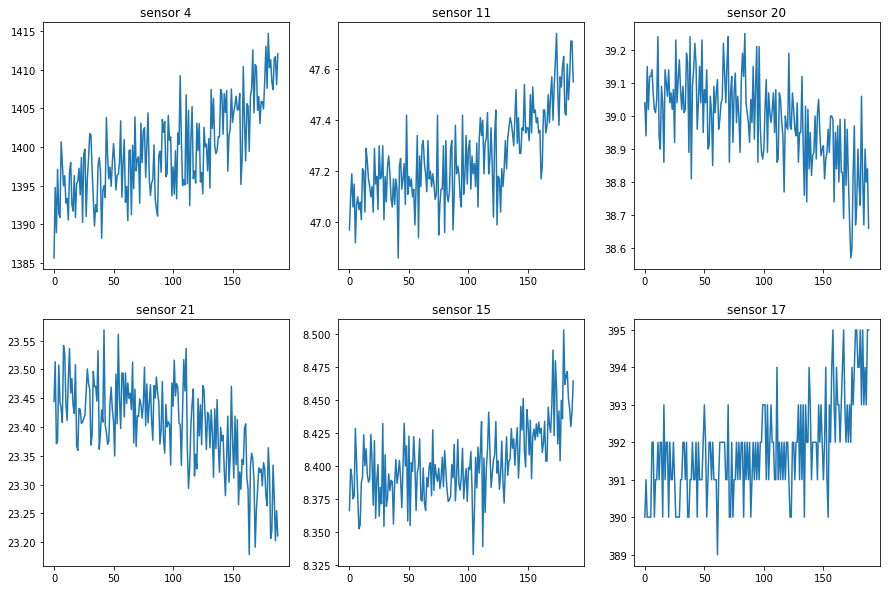

In [30]:
# error rank is zero-based index from errors table. you can modify this to display different samples
error_rank = 0
df = get_data_by_unit_id(test1, unit_id=np.asarray(errors['unit_id'])[error_rank], columns=sensors)
plotter(df, fig_size=(15,10), nr_rows=2, nr_cols=3, randomize=False, sub_title_prefix=sensors)

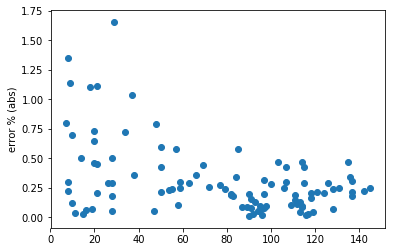

In [31]:
plt.scatter(errors['rul'], errors['err_pct_abs'])
#plt.xlabel('rul', fontsize=10)
plt.ylabel('error % (abs)', fontsize=10)
plt.show()

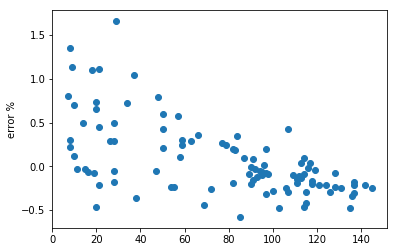

In [32]:
plt.scatter(errors['rul'], errors['err_pct'])
#plt.xlabel('rul', fontsize=10)
plt.ylabel('error %', fontsize=10)
plt.show()